<a href="https://colab.research.google.com/github/DarkWorldCoder/LearningAI/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: >

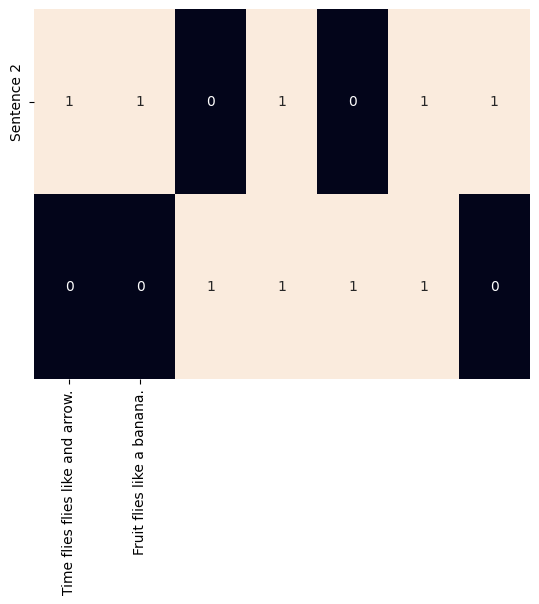

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ["Time flies flies like and arrow.",
          "Fruit flies like a banana."
          ]
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(one_hot,annot=True,cbar=False,xticklabels=corpus,yticklabels=["Sentence 2"])


In [ ]:
def describe(x):
  print("Type: {}".format(x.type()))
  print("Shape/size: {}".format(x.shape))
  print("Values: \n {}".format(x))

In [ ]:
import torch
describe(torch.Tensor(2,3))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[1.1138e-03, 4.4551e-41, 1.1138e-03],
        [4.4551e-41, 9.9768e-13, 4.4550e-41]])


In [ ]:
import torch
describe(torch.rand(2,3))
describe(torch.randn(2,3))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[0.2074, 0.9248, 0.4117],
        [0.9943, 0.3476, 0.7229]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[0.5860, 0.6515, 0.0542],
        [1.6466, 0.0917, 0.3652]])


In [ ]:
import torch
describe(torch.zeros(2,3))
x = torch.ones(2,3)
describe(x)
x.fill_(5)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [ ]:
import torch
import numpy as np
npy = np.random.rand(2,3)
describe(torch.from_numpy(npy))

Type: torch.DoubleTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[0.6316, 0.7894, 0.6286],
        [0.2283, 0.5572, 0.3984]], dtype=torch.float64)


In [ ]:
indices = torch.LongTensor([0,2])
describe(torch.index_select(x,dim=1,index=indices))


Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
 tensor([[5., 5.],
        [5., 5.]])


In [ ]:
import torch
x1 = torch.arange(6).view(2,3)
describe(x1)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
x = torch.rand(3,3).to(device)

In [ ]:
y = torch.rand(3,3)
x + y

tensor([[1.2905, 0.2135, 1.1451],
        [0.8037, 0.4439, 1.3052],
        [0.5883, 0.2059, 1.4702]])

In [ ]:
cpu_device = torch.device("cpu")
y = y.to(cpu_device)
x = x.to(cpu_device)
x + y

tensor([[1.2905, 0.2135, 1.1451],
        [0.8037, 0.4439, 1.3052],
        [0.5883, 0.2059, 1.4702]])

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
text = "Mary, don't slap the green witch"
print([str(token) for token in nlp(text.lower())])

['mary', ',', 'do', "n't", 'slap', 'the', 'green', 'witch']


In [ ]:
from nltk.tokenize import TweetTokenizer
tweet = u"Snow White and the Seven Degrees #MakeAMovieCold@midnight:-)"
tokenizer = TweetTokenizer()
print(tokenizer.tokenize(tweet.lower()))

['snow', 'white', 'and', 'the', 'seven', 'degrees', '#makeamoviecold', '@midnight', ':-)']


In [ ]:
def n_grams(text,n):
  words = text.split(" ")
  return [words[i:i+n] for i in range(len(words)-n+1)]

cleaned = ['mary', ',', "n't", 'slap', 'green', 'witch', '.']
print(n_grams(text=" ".join(cleaned),n=3))

[['mary', ',', "n't"], [',', "n't", 'slap'], ["n't", 'slap', 'green'], ['slap', 'green', 'witch'], ['green', 'witch', '.']]


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(u"he was running late")
for token in doc:
  print("{} --> {}".format(token,token.lemma_))

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


he --> he
was --> be
running --> run
late --> late


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(u"Mary slapped the green witch.")
for token in doc:
  print("{} --> {}".format(token,token.pos_))


Mary --> PROPN
slapped --> VERB
the --> DET
green --> ADJ
witch --> NOUN
. --> PUNCT


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(u"Mary slapped the green witch.")
for chunk in doc.noun_chunks:
  print("{} --> {}".format(chunk,chunk.label_))

Mary --> NP
the green witch --> NP


In [ ]:
import torch
import torch.nn as nn

class Perceptron(nn.Module):

  def __init__(self,input_dim):
    super(Perceptron,self).__init__()
    self.fc1 = nn.Linear(input_dim,1)

  def forward(self,x_in):
    return torch.sigmoid(self.fc1(x_in)).squeeze()

<ipython-input-19-0edefc7caec7>:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5.,5.,0.1)


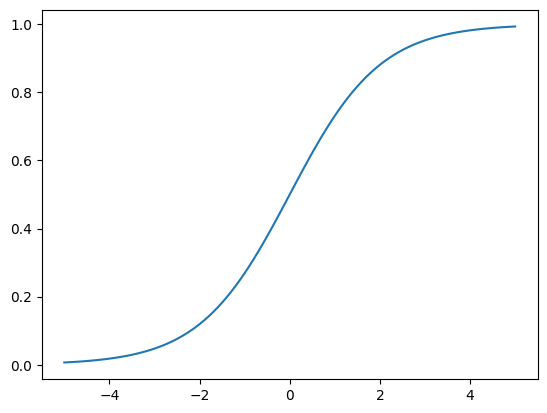

In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.range(-5.,5.,0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(),y.numpy())
plt.show()

In [ ]:
import torch
import torch.nn as nn

mse_loss = nn.MSELoss()
outputs = torch.randn(3,5,requires_grad=True)
targets = torch.randn(3,5)
loss = mse_loss(outputs,targets)
print(loss)

tensor(2.6166, grad_fn=<MseLossBackward0>)


In [ ]:
import torch.nn as nn
import torch.optim as optim

input_dim =2
lr = 0.001
perceptron = Perceptron(input_dim=input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=perceptron.parameters(),lr=lr)

In [ ]:
for epoch_i in range(n_epochs):
# the inner loop is over the batches in the dataset
  for batch_i in range(n_batches):
    # Step 0: Get the data
    x_data, y_target = get_toy_data(batch_size)
    # Step 1: Clear the gradients
    perceptron.zero_grad()
    # Step 2: Compute the forward pass of the model
    y_pred = perceptron(x_data, apply_sigmoid=True)
    # Step 3: Compute the loss value that we wish to optimize
    loss = bce_loss(y_pred, y_target)
    # Step 4: Propagate the loss signal backward
    loss.backward()
    # Step 5: Trigger the

NameError: name 'n_epochs' is not defined

In [ ]:
class Vocabulary(object):
  def __init__(self,token_to_idx=None,add_unk=True,unk_token="<UNK>"):
    if token_to_idx is None:
      token_to_idx = {}
    self._token_to_idx = token_to_idx
    self._idx_to_token = {idx:token for token,idx in self._token_to_idex.items()}
    self._add_unk = add_unk
    self._unk_token = unk_token
    self.unk_index = -1

    if add_unk:
      self.unk_index = self.add_token(unk_token)
  def to_serializable(self):
    return {"token_to_idx":self._token_to_idx,
            "add_unk":self._add_unk,
            "unk_token":self._unk_token}
  @classmethod
  def from_serializable(cls,contents):
    return cls(**contents)

  def add_token(self,token):

    if token in self._token_to_idx:
      index = self._token_to_idx[token]
    else:
      index = len(self._token_to_idx)
      self._token_to_idx[token] = index
      self._idx_to_token[index] = token
    return index

  def lookup_token(self,token):
    if self.add_unk:
      return self._token_to_idx.get(token,self.unk_index)
    else:
      return self._token_to_idx[token]

  def lookup_index(self,index):
    if index not in self._idx_to_token:
      raise KeyError("the index (%d) is not in the Vocabulary" % index)
    return self._idx_to_token[index]

  def __str__(self):
    return "<Vocabulary(size=%d)>" % len(self)

  def __len__(self):
    return len(self._token_to_idx)






In [ ]:
from typing import Counter
class ReviewVectorizer(object):
  def __init__(self,review_vocab,rating_vocab):
    self.review_vocab = review_vocab
    self.rating_vocab = rating_vocab

  def vectorize(self,review):
    one_hot = np.zeros(len(self.review_vocab),dtype=np.float32)

    for token in review.split(" "):
      if token not in string.punctuation:
        one_hot[self.review_vocab.lookup_token(token)] = 1

    return one_hot

  @classmethod
  def from_dataframe(cls,review_df,cutoff=25):
    review_vocab = Vocabulary(add_unk=True)
    rating_vocab = Vocabulary(add_unk=False)

    for rating in sorted(set(review_df.rating)):
      rating_vocab.add_token(rating)

    word_counts = Counter()
    for review in review_df.review:
      for word in review.split(" "):
        if word not in string.punctuation:
          word_counts[word] +=1
    for word,count in word_counts.items():
      if count > cutoff:
        review_vocab.add_token(word)

      return cls(review_vocab,rating_vocab)

  @classmethod
  def from_serializable(cls,contents):
    review_vocab = Vocabulary.from_serializable(contents['review_vocab'])
    rating_vocab = Vocabulary.from_serializable(contents['rating_vocab'])
    return cls(review_vocab=review_vocab,rating_vocab=rating_vocab)

  def to_serializable(self):
    return {'review_vocab':self.review_vocab.to_serializable(),
            'rating_vocab':self.rating_vocab.to_serializable()}

  def generate_batches(dataset,batch_sizze,shuffle=True,drop_last=True,device="cpu"):
    dataloader = DataLoader(dataset=dataset,batch_size=batch_size,shuffle=shuffle,drop_last=drop_last)
    for data_dict in dataloader:
      out_data_dict = {}
      for name,tensor in data_dict.items():
        out_data_dict[name] = data_dict[name].to(device)
      yield out_data_dict



In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class ReviewClassifier(nn.Module):
  def __init__(self,num_features):
    super(ReviewClassifier,self).__init__()
    self.fc1 = nn.Linear(in_features=num_features,out_features=1)

  def forward(self,x_in,apply_sigmoid=False):
    y_out = self.fc1(x_in).squeeze()
    if apply_sigmoid:
      y_out = F.sigmoid(y_out)
    return y_out

In [ ]:
from argparse import Namespace

args = Namespace(
    frequency_cutoff =25,
    model_state_file="model.pth",
    review_csv="data/yelp/reviews_with_splits_lite.csv",
    save_dir="model_storage/ch3/yelp/",
    vectorizer_file="vectorizer.json",
    batch_size = 128,
    early_stopping_criteria=5,
    learning_rate=0.001,
    num_epochs=100,
    seed=1337

)

In [ ]:
print("hekko")